In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
chicagotrips=pd.read_csv(r"C:\Users\Hp\Downloads\chicago Taxi Trips daily.csv")

In [4]:
chicagotrips

,daily,f0_
0,2013-01-01,56953
1,2013-01-02,36830
2,2013-01-03,38808
3,2013-01-04,50391
4,2013-01-05,48352
...,...,...
3768,2023-04-27,23188
3769,2023-04-28,22088
3770,2023-04-29,16106
3771,2023-04-30,16228


In [5]:
chicagotrips.columns=["Date","Trips"]

In [6]:
chicagotrips

,Date,Trips
0,2013-01-01,56953
1,2013-01-02,36830
2,2013-01-03,38808
3,2013-01-04,50391
4,2013-01-05,48352
...,...,...
3768,2023-04-27,23188
3769,2023-04-28,22088
3770,2023-04-29,16106
3771,2023-04-30,16228


In [9]:
chicagotrips.Date=pd.to_datetime(chicagotrips.Date,errors="coerce")

In [15]:
# year wise total trips
yearly=pd.pivot_table(chicagotrips,values="Date",index=pd.Grouper(freq="A",key="Date"),aggfunc="sum")

In [16]:
yearly=yearly.reset_index()

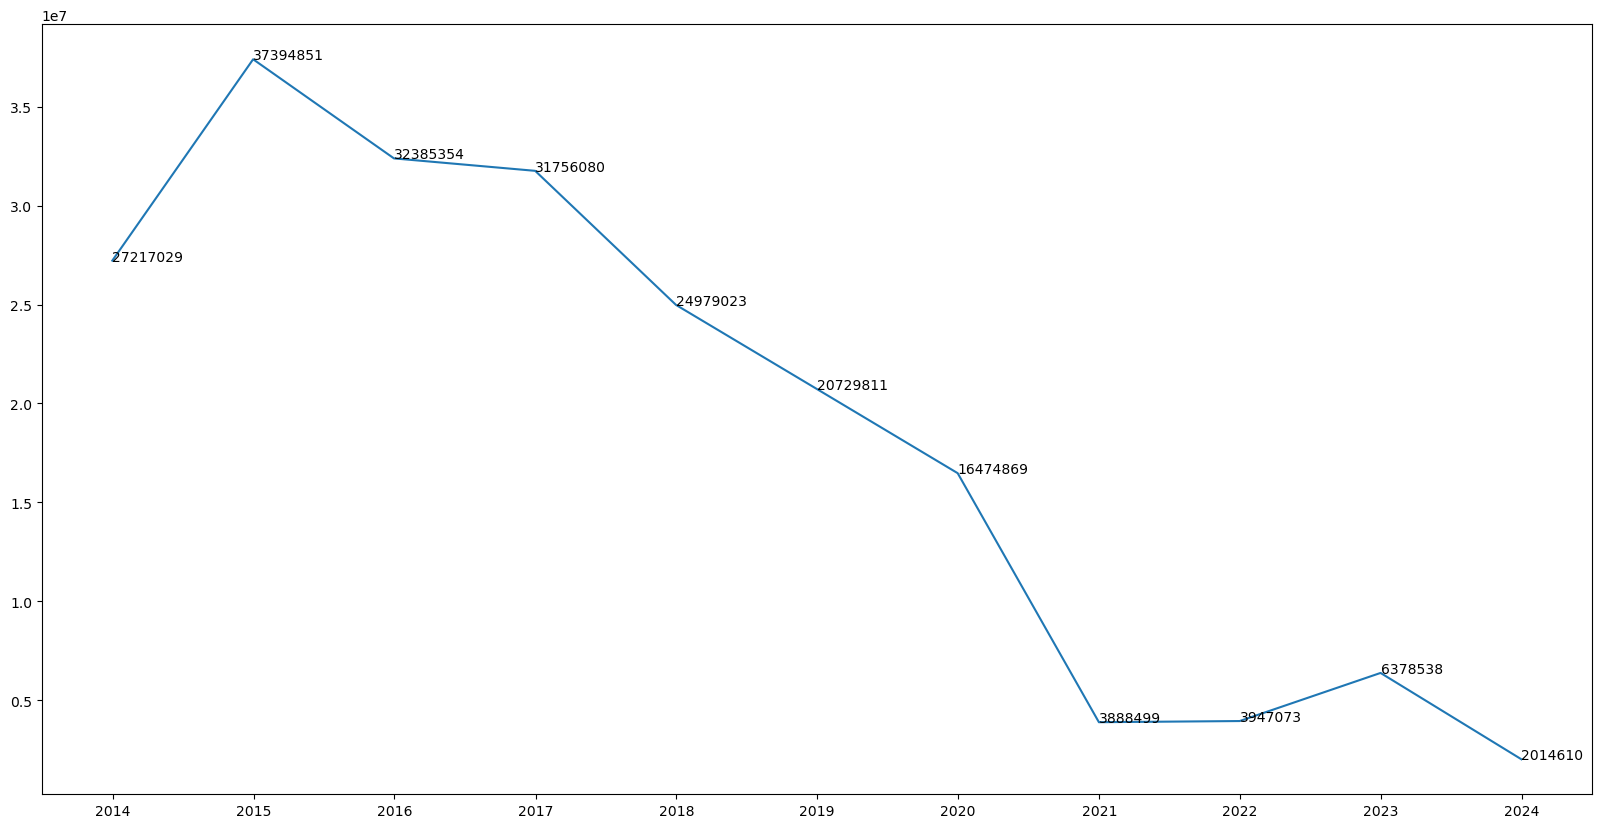

In [17]:
plt.figure(figsize=(20,10))
plt.plot(yearly.Date,yearly.Trips)
for x,y in zip(yearly.Date,yearly.Trips):
    label=y
    plt.annotate(label,(x,y))

In [20]:
monthly=pd.pivot_table(chicagotrips,values="Date",index=pd.Grouper(freq="M",key="Date"),aggfunc="sum")

In [21]:
monthly=monthly.reset_index()

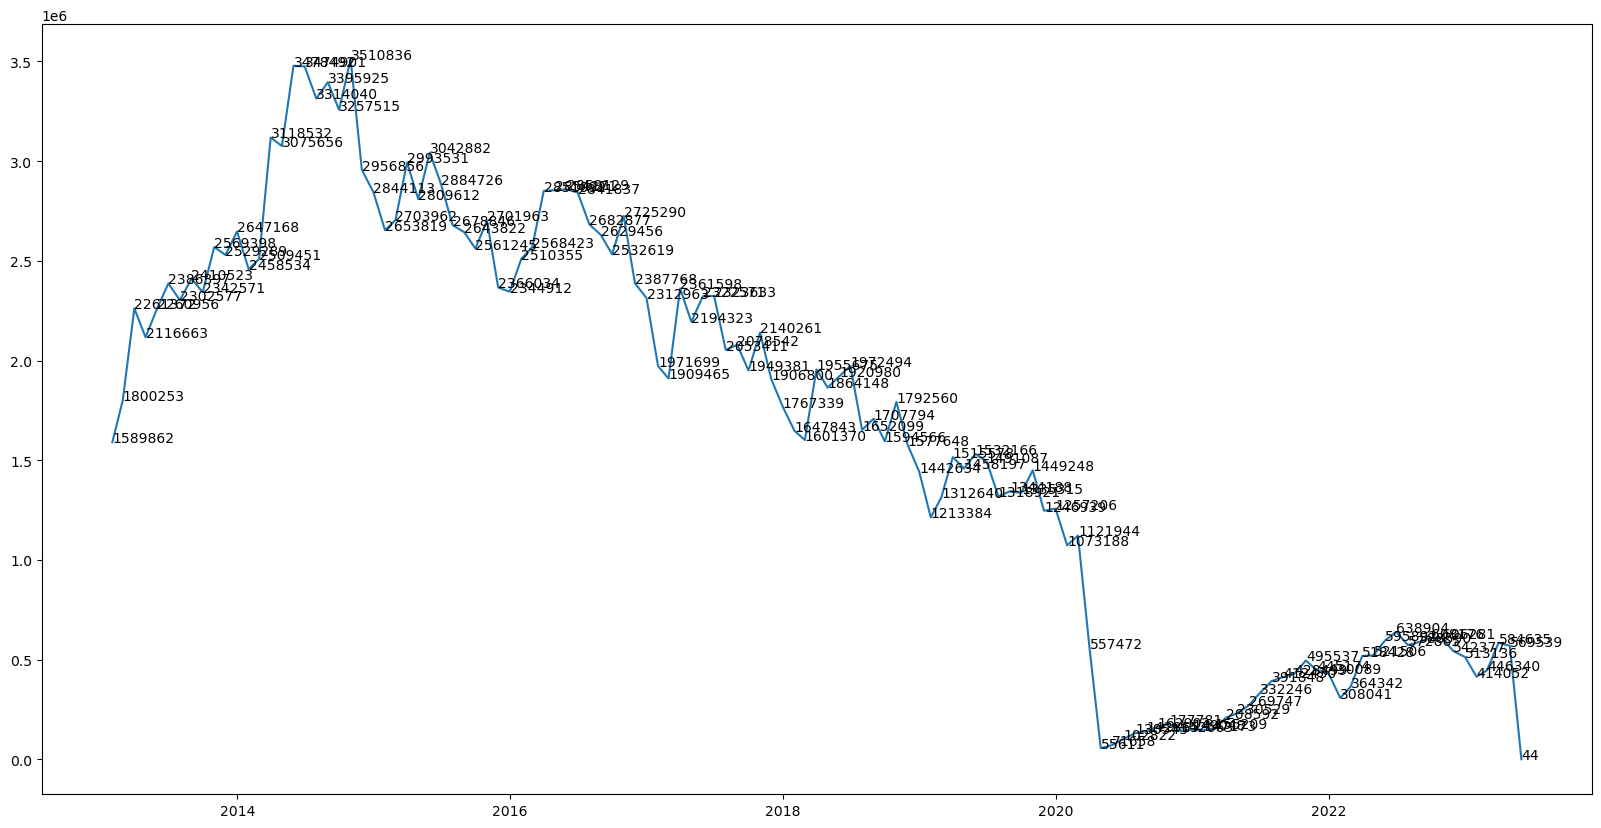

In [22]:
plt.figure(figsize=(20,10))
plt.plot(monthly.Date,monthly.Trips)
for x,y in zip(monthly.Date,monthly.Trips):
    label=y
    plt.annotate(label,(x,y))

In [23]:
chicagotrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3773 non-null   datetime64[ns]
 1   Trips   3773 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 59.1 KB


In [24]:
chicagotrips.index=chicagotrips.Date

In [25]:
chicagotrips=chicagotrips.drop("Date",axis=1)

<Axes: xlabel='Date'>

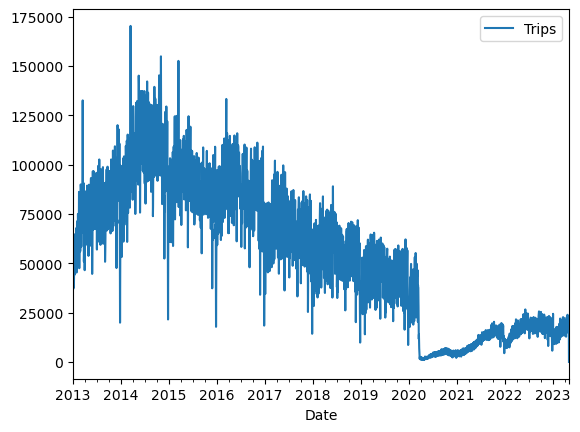

In [26]:
chicagotrips.plot()

In [27]:
from statsmodels.tsa.stattools import adfuller

In [29]:
adfuller(chicagotrips)

(-0.8449318458264293,
 0.8055662136210677,
 30,
 3742,
 {'1%': -3.432098741718118,
  '5%': -2.8623126975788264,
  '10%': -2.5671813176558236},
 75811.60639161228)

In [30]:
from statsmodels.tsa.stattools import kpss

In [31]:
kpss(chicagotrips)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2624\4171414803.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(chicagotrips)


(8.471009687129213,
 0.01,
 38,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [32]:
chicagotrips_diff=chicagotrips.diff()

In [33]:
chicagotrips_diff=chicagotrips_diff.dropna()

<Axes: xlabel='Date'>

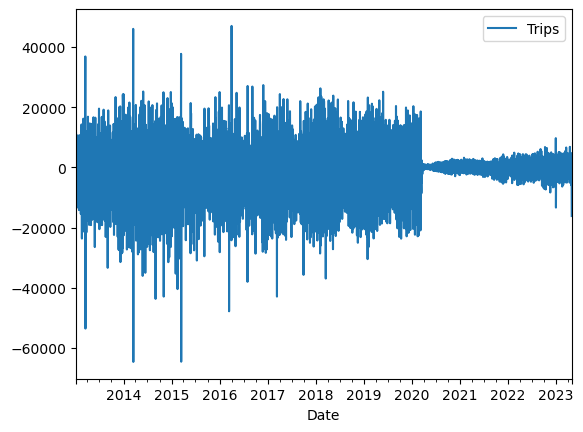

In [34]:
chicagotrips_diff.plot()

In [35]:
adfuller(chicagotrips_diff)

(-17.36497116905552,
 5.177495704867715e-30,
 30,
 3741,
 {'1%': -3.43209920949247,
  '5%': -2.8623129042084874,
  '10%': -2.5671814276580465},
 75783.13327351694)

In [36]:
kpss(chicagotrips_diff)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2624\3718541316.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(chicagotrips_diff)


(0.08887307652213643,
 0.1,
 77,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [37]:
chicagotrips_diff.head()

,Trips
Date,
2013-01-02,-20123.0
2013-01-03,1978.0
2013-01-04,11583.0
2013-01-05,-2039.0
2013-01-06,-10803.0


In [38]:
from pmdarima.arima import auto_arima

In [39]:
chicagotrips_arima=auto_arima(chicagotrips_diff,stationary=True,start_p=0,start_q=0)

In [40]:
chicagotrips_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3772
Model:               SARIMAX(5, 0, 5)   Log Likelihood              -38399.449
Date:                Thu, 04 Jan 2024   AIC                          76822.899
Time:                        12:31:46   BIC                          76897.723
Sample:                    01-02-2013   HQIC                         76849.501
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -22.0564    431.505     -0.051      0.959    -867.791     823.678
ar.L1         -0.0814      0.114     -0.712      0.477      -0.306       0.143
ar.L2         -0.7391      0.091     -8.082      0.000      -0.918      -0.560
ar.L3         -0.4703      0.165     -2.847      0.004      -0.794      -0.147
ar.L4         -0.2938      0.091     -3.212      0.001      -0.473      -0.114
ar.L5         -0.8782      0.114     -7.680      0.000      -1.102      -0.654
ma.L1          0.0840      0.118      0.713      0.476      -0.147       0.315
ma.L2          0.7183      0.093      7.717      0.000       0.536       0.901
ma.L3          0.4264      0.165      2.588      0.010       0.103       0.749
ma.L4          0.2591      0.092      2.802      0.005       0.078       0.440
ma.L5          0.7991      0.111      7.224      0.000       0.582       1.016
sigma2      4.948e+07      0.044   1.12e+09      0.000    4.95e+07    4.95e+07
===================================================================================
Ljung-Box (L1) (Q):                  64.25   Jarque-Bera (JB):             14149.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.23e+23. Standard errors may be unstable.
"""

In [41]:
trips_arima=auto_arima(chicagotrips,stationary=False,start_p=0,start_q=0,
                            trace=True,max_p=8,max_q=8,error_action="ignore",suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=80112.355, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80041.934, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=79949.344, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=80110.364, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=79865.550, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78789.823, Time=0.86 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=79575.096, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=78788.445, Time=1.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=79484.291, Time=0.52 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=78462.197, Time=1.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=79006.294, Time=0.59 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=77948.809, Time=1.36 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=77986.491, Time=1.17 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=77763.834, Time=3.10 sec
 ARIMA(6,1,0)(0,0,0

In [42]:
chicagotrips_forecast=chicagotrips_arima.predict(n_periods=2)

In [43]:
chicagotrips_forecast

2023-05-02    2026.805106
2023-05-03     438.474493
Freq: D, dtype: float64

In [44]:
chicagotrips_arima=auto_arima(chicagotrips,stationary=False,start_p=0,start_q=0,
                            trace=True,error_action="ignore",suppress_warning=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=80112.355, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80041.934, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=79949.344, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=80110.364, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=79865.550, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=78789.823, Time=0.84 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=79575.096, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=78788.445, Time=1.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=79484.291, Time=0.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=78462.197, Time=1.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=79006.294, Time=0.55 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=77948.809, Time=1.16 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=77986.491, Time=0.79 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=77636.201, Time=2.73 sec
 ARIMA(4,1,2)(0,0,0

In [45]:
chicagotrips_forecast=chicagotrips_arima.predict(n_periods=3)

In [46]:
chicagotrips_forecast

2023-05-02    5062.632751
2023-05-03    4982.315179
2023-05-04    6914.987434
Freq: D, dtype: float64

In [47]:
chicagotrips_df=chicagotrips.reset_index()

In [52]:
chicagotrips_df.columns=["ds","y"]

In [53]:
!pip install prophet

In [60]:
trip_predict=trips_arima.predict(n_periods=120)

In [61]:
index_fc=pd.date_range(chicagotrips.index[-1],periods=120,freq="M")

In [62]:
trip_predict=pd.DataFrame(trip_predict)

In [63]:
trip_predict.index=index_fc

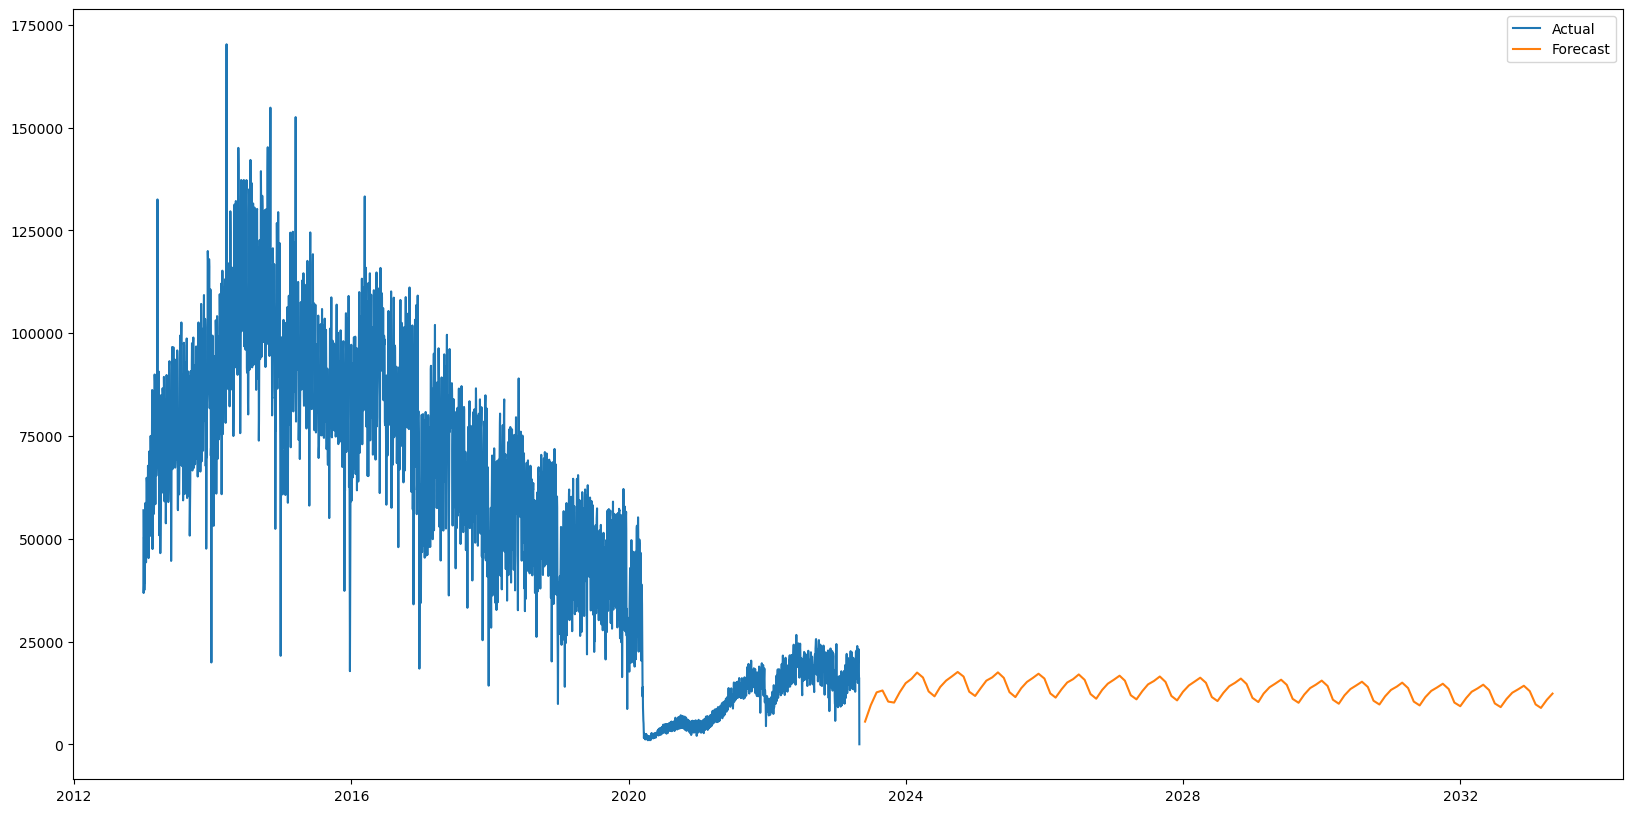

In [64]:
plt.figure(figsize=(20,10))
plt.plot(chicagotrips,label="Actual")
plt.plot(trip_predict,label="Forecast")
plt.legend()
plt.show()

In [54]:
from prophet import Prophet

In [55]:
m=Prophet()
m.fit(chicagotrips_df)

12:43:32 - cmdstanpy - INFO - Chain [1] start processing
12:43:33 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
future=m.make_future_dataframe(periods=12,freq="M")

In [57]:
forecast=m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(13)

,ds,yhat,yhat_lower,yhat_upper
3772,2023-05-01,19446.378455,6081.068399,31717.142354
3773,2023-05-31,27472.145156,14180.641413,39977.651538
3774,2023-06-30,30307.272507,17412.491195,41651.973708
3775,2023-07-31,21279.254000,8796.992666,34593.014825
3776,2023-08-31,26263.873761,13738.272580,37973.007871
3777,2023-09-30,29531.768368,16524.347796,42776.972877
3778,2023-10-31,30384.147964,17310.374563,43061.865145
3779,2023-11-30,30228.351336,16896.738659,44934.729564
3780,2023-12-31,2670.297553,-9732.587275,16718.710990
3781,2024-01-31,23809.719214,8411.340417,38862.517179


In [58]:
future

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
3780,2023-12-31
3781,2024-01-31
3782,2024-02-29
3783,2024-03-31


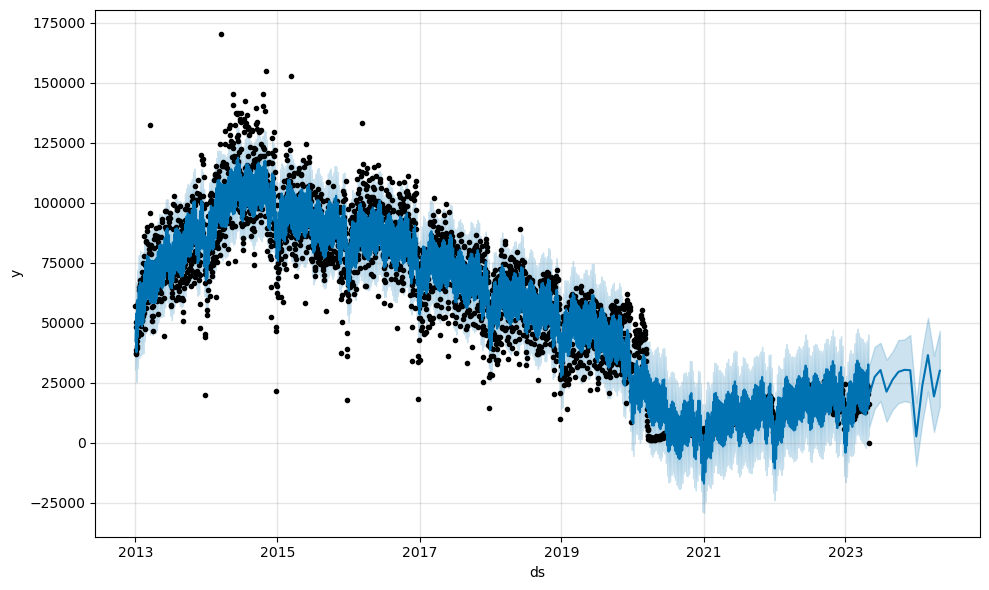

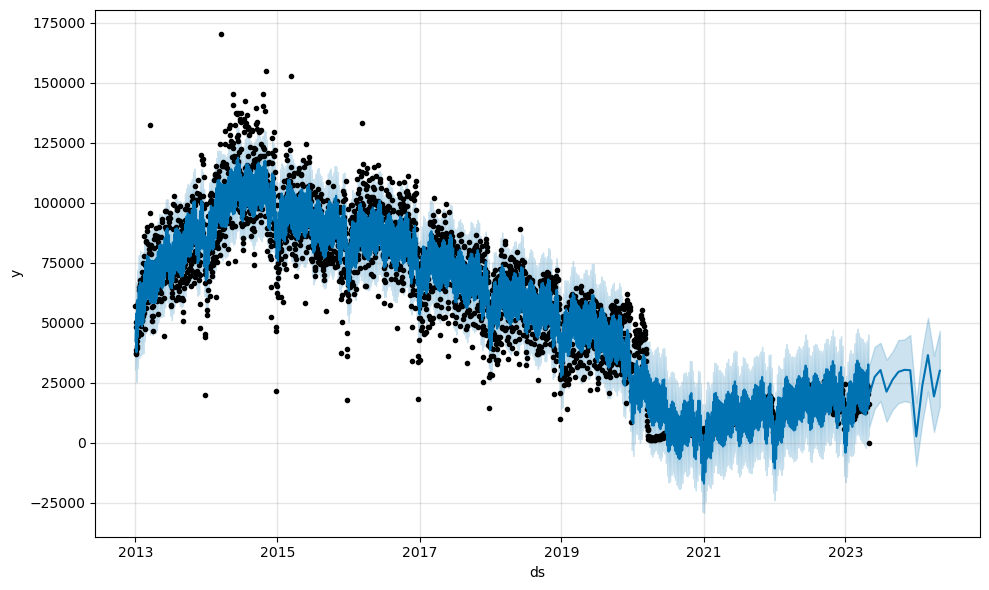

In [59]:
m.plot(forecast)
# black dots-actual data
# blue lines(graphs)-differencing data